In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
!pip install pingouin
import pingouin as pg
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 24.1 which is incompatible.
jupyterlab 4.2.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.

# Introduction

This kernel attempts to analyze the community health evaluation dataset and make statistic inferences out of that. It involves many statistical procedures as well as the explanations. 

The dataset involves records of 347 unique participants. The explanations of the predictors can be found in [here](https://www.kaggle.com/datasets/ziya07/community-health-evaluation-dataset/data). The possible questions would be:

1. Does women have a better life quality?

We know that women tend to live longer compared to men for various reasons ([Link](https://www.health.harvard.edu/blog/why-men-often-die-earlier-than-women-201602199137)).

2. Does utilizing healthcare sevices yields better life quality?

One of the reason why men may have a shorter life span is that they visit doctor less often ([Link](https://www.health.harvard.edu/blog/why-men-often-die-earlier-than-women-201602199137#:~:text=According%20to%20the%20Agency%20for%20Healthcare%20Research%20and%20Quality%2C%20men%20are%20far%20more%20likely%20to%20skip%20routine%20health%20screens%20and%20far%20less%20likely%20than%20women%20to%20have%20seen%20a%20doctor%20of%20any%20kind%20during%20the%20previous%20year.)).

3. Does age and life quality has an inverse relationship?

We know that as we age our life quality suffers.

4. Does socioeconomic status have a role on life quality?

People having better socioeconomic status generally have more healthcare opportunities.

Other than these research questions, the relationship between the predictors will be analyzed. I hope the viewers found this work informative and educative.

# Exploratory Data Analysis

In [2]:
df = pd.read_csv("/kaggle/input/community-health-evaluation-dataset/community_health_evaluation_dataset.csv")
df.head()

,Participant ID,Age,Gender,SES,Service Type,Visit Frequency,Step Frequency (steps/min),Stride Length (m),Joint Angle (°),EMG Activity,Patient Satisfaction (1-10),Quality of Life Score
0,1,56,F,4,Rehab,Weekly,85,0.54,17.99,Low,1,57
1,2,69,M,1,Preventive,Yearly,80,0.70,13.05,Moderate,8,94
2,3,46,M,4,Rehab,Yearly,81,0.57,29.85,Moderate,4,66
3,4,32,F,1,Consultation,Weekly,66,0.78,28.54,Moderate,9,66
4,5,60,M,3,Preventive,Weekly,73,0.84,20.80,High,5,98


### The Relationship Between Service Type and Socioeconomic Status

In [3]:
service_type_socio = df.groupby("SES")["Service Type"].\
value_counts(normalize = True).reset_index()\
.pivot(index = "SES",columns = "Service Type",values = "proportion") * 100
service_type_socio

Service Type,Consultation,Preventive,Rehab
SES,,,
1,33.644860,30.841121,35.514019
2,31.325301,42.168675,26.506024
3,33.734940,34.939759,31.325301
4,36.486486,29.729730,33.783784


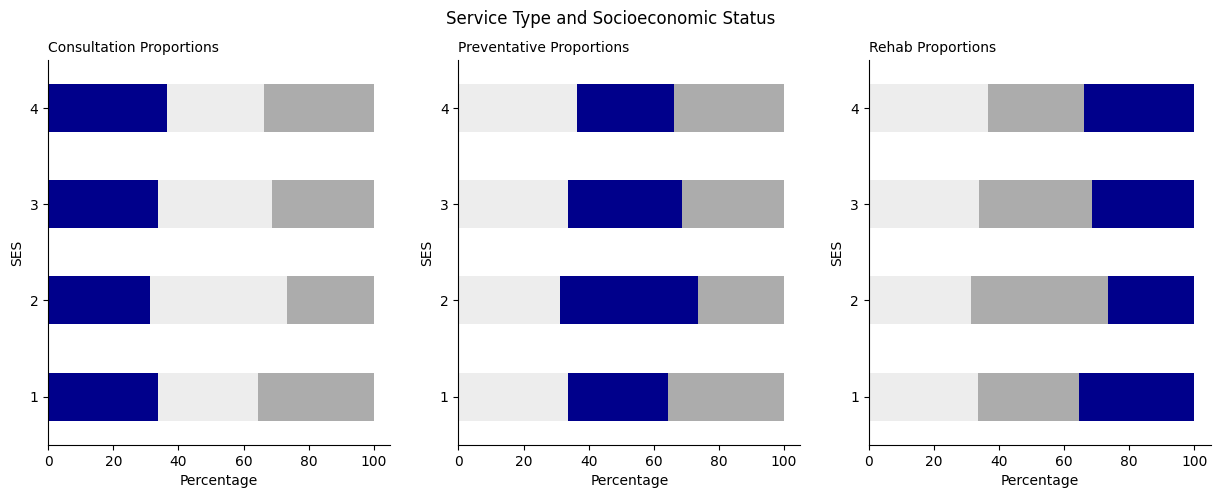

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize = (15,5))
colors1 = ["darkblue", "#ededed" , "#acacac"]
colors2 = ["#ededed", "darkblue", "#acacac"]
colors3 = ["#ededed", "#acacac", "darkblue"]

service_type_socio.plot(kind = "barh",stacked = True, ax = ax[0], color = colors1, legend = False)
service_type_socio.plot(kind = "barh",stacked = True, ax = ax[1], color = colors2, legend = False)
service_type_socio.plot(kind = "barh",stacked = True, ax = ax[2], color = colors3, legend = False)

ax[0].set_title("Consultation Proportions", loc = "left",fontsize = 10)
ax[1].set_title("Preventative Proportions", loc = "left",fontsize = 10)
ax[2].set_title("Rehab Proportions", loc = "left",fontsize = 10)

ax[0].set_xlabel("Percentage")
ax[1].set_xlabel("Percentage")
ax[2].set_xlabel("Percentage")

fig.suptitle("Service Type and Socioeconomic Status")
fig.show()

From the plots, it can be understood that socioeconomic status probably doesn’t impact the type of healthcare utilization. The slight variation between the groups can easily be explained by chance and thus does not require further analysis.

### Gender and The Service Type 

In [5]:
service_type_gender = df.groupby("Gender")["Service Type"].\
value_counts(normalize = True).reset_index()\
.pivot(index = "Gender",columns = "Service Type",values = "proportion") * 100
service_type_gender

Service Type,Consultation,Preventive,Rehab
Gender,,,
F,31.521739,34.239130,34.239130
M,36.196319,34.355828,29.447853


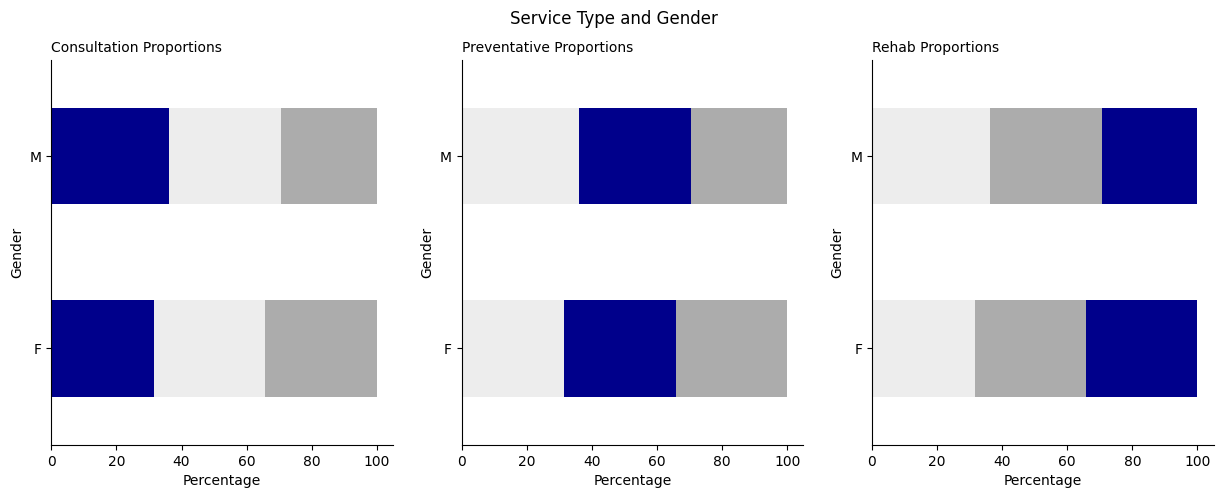

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize = (15,5))
colors1 = ["darkblue", "#ededed" , "#acacac"]
colors2 = ["#ededed", "darkblue", "#acacac"]
colors3 = ["#ededed", "#acacac", "darkblue"]

service_type_gender.plot(kind = "barh",stacked = True, ax = ax[0], color = colors1, legend = False)
service_type_gender.plot(kind = "barh",stacked = True, ax = ax[1], color = colors2, legend = False)
service_type_gender.plot(kind = "barh",stacked = True, ax = ax[2], color = colors3, legend = False)

ax[0].set_title("Consultation Proportions", loc = "left",fontsize = 10)
ax[1].set_title("Preventative Proportions", loc = "left",fontsize = 10)
ax[2].set_title("Rehab Proportions", loc = "left",fontsize = 10)

ax[0].set_xlabel("Percentage")
ax[1].set_xlabel("Percentage")
ax[2].set_xlabel("Percentage")

plt.suptitle("Service Type and Gender")
fig.show()

From the plots, we can infer the same conclusion. The type of healthcare utilization does not change much between the genders.

### Age and Quality of Life

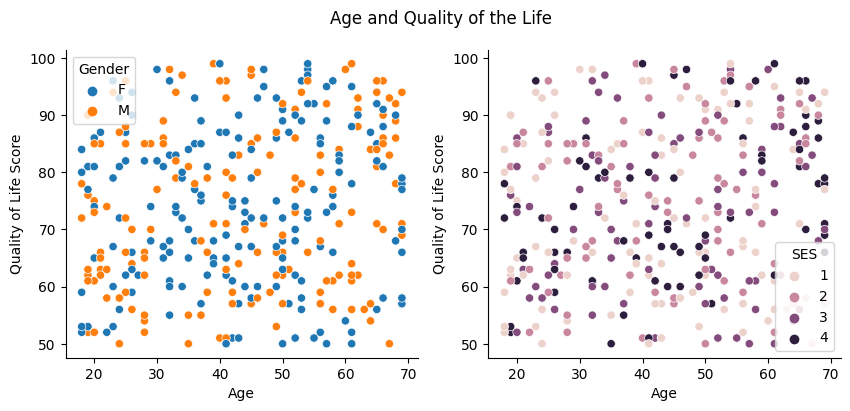

In [7]:
fig,ax = plt.subplots(ncols = 2,nrows = 1, figsize = (10,4))
sns.scatterplot(x = "Age", y = "Quality of Life Score",data = df, hue = "Gender",ax = ax[0])
sns.scatterplot(x = "Age", y = "Quality of Life Score",data = df, hue = "SES", ax = ax[1])

plt.suptitle("Age and Quality of the Life")
fig.show()

Interestingly enough, the quality of life does not affected by the age, socioeconomic status and the gender of the participants. The data points are somewhat uniformly distributed on the figures. This finding contradicts with my expectation.

## Visiting Frequency and Quality of Life Score

In [8]:
df.groupby("Visit Frequency")["Quality of Life Score"].agg(["min","max","mean","median"]).round(2)

,min,max,mean,median
Visit Frequency,,,,
Monthly,50,98,73.81,72.0
Weekly,50,99,72.91,71.5
Yearly,50,99,75.90,78.0


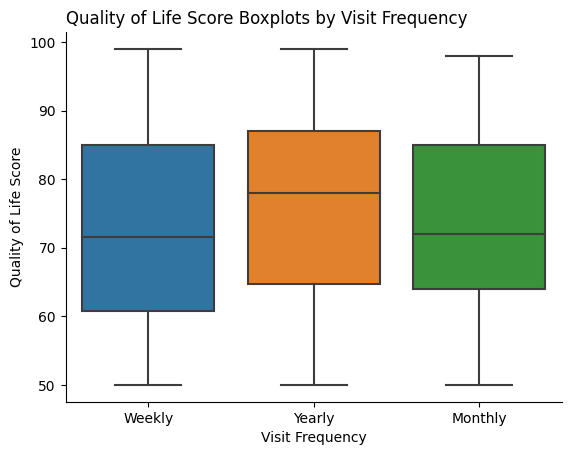

In [9]:
plt.figure()
sns.boxplot(x = "Visit Frequency", y = "Quality of Life Score", data = df)
plt.title("Quality of Life Score Boxplots by Visit Frequency",loc = "left")
plt.show()

From the plots and the summary table, it can be concluded that groups slightly differ in terms of medians and interquartile ranges. Note that the minimum and the maximum values between the groups are the same. Also there are no outliers in any of the groups. 

Let's test whether these differences are statistically significant. The corresponding hypotheses are:

$H_0: \mu_{yearly} = \mu_{monthly} = \mu_{weekly}$

$H_A: \mu_i \neq \mu_j$ for at least one $i,j$ pair.

Since we compare more than two groups at once and dealing with continuous variables, we will use ANOVA. But first we need to check the requirements: 

* At least 30 samples for each group.
* The variances are somewhat the same between the groups.
* The distributions are somewhat normal.

In [10]:
df["Visit Frequency"].value_counts()

Visit Frequency
Weekly     120
Yearly     116
Monthly    111
Name: count, dtype: int64

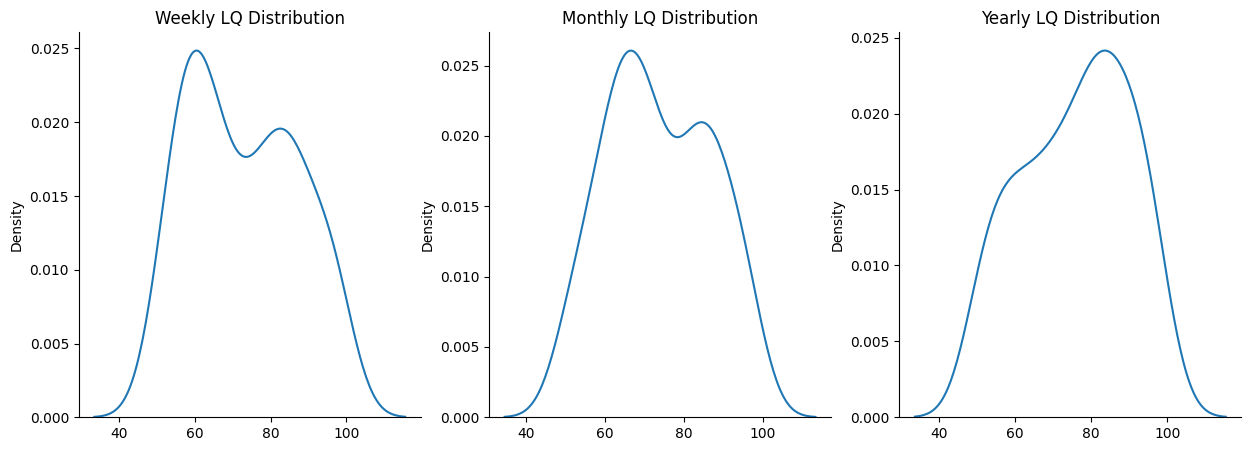

In [11]:
weekly = df[df["Visit Frequency"] == "Weekly"]["Quality of Life Score"].values
yearly = df[df["Visit Frequency"] == "Yearly"]["Quality of Life Score"].values
monthly = df[df["Visit Frequency"] == "Monthly"]["Quality of Life Score"].values

fig,ax = plt.subplots(ncols = 3,nrows = 1,figsize = (15,5))
sns.kdeplot(weekly,ax = ax[0])
sns.kdeplot(monthly,ax = ax[1])
sns.kdeplot(yearly, ax = ax[2])
ax[0].set_title("Weekly LQ Distribution")
ax[1].set_title("Monthly LQ Distribution")
ax[2].set_title("Yearly LQ Distribution")
fig.show()

The *Bartlett test* can be used for monitoring the variance differences between the groups.

In [12]:
stats.bartlett(weekly,monthly,yearly)

BartlettResult(statistic=0.9306924983871512, pvalue=0.627917651564756)

All the requirements are met. Therefore, we can apply one way ANOVA.

In [13]:
stats.f_oneway(weekly, monthly, yearly)

F_onewayResult(statistic=1.4189919490203613, pvalue=0.2433704196579581)

Before making inferences, we need to make a correction on critical p-value. The p-value of 0.05 is convenient to use but when we make multiple hypothesis testing on the same dataset we need to control FWER (family wise error rate). 

When we set $\alpha = 0.05$ it means that there is a 5% probability to reject $H_0$ even if there is no evidence. If we increase the number of tests we conduct, these probabilities would accumulate, thus we need to make some arrangements.

For example, let's say we conduct 5 tests. Then our ability to correctly reject all $H_0$s is

$0.95^5 \approx 0.77$

One way to prevent this is to apply *Bonferroni Correction*. According to this method, $p_{critical}$ should be divided to the number of tests $m$ we conduct.

$p_{crit,adj} = \frac {p_{crit}} {m}$

In this study, I conducted two tests so the critical p-value is 0.025. The p_{value} of the test is 0.24 indicating that the groups are not statistically different from each other. 

What about the effect size? Effect size is a measure showing the importance of the test result in practice. $\eta^2$ measure is used for determining effect size of ANOVA. To calculate the $\eta^2$, we first need to compute $SS_{between}$, $SS_{within}$, and $SS_{total}$.

$SS_{within}:$ Variance of data points with respect to the group mean.

$SS_{between}:$ Variance of groups with respect to the grand mean.

$SS_{total} = SS_{between} + SS_{within}$ 

In [14]:
combined_groups = np.concatenate((weekly,monthly,yearly))
grand_mean = np.mean(combined_groups)

ss_within = np.sum(np.square(weekly - weekly.mean())) + \
            np.sum(np.square(monthly - monthly.mean())) + \
            np.sum(np.square(yearly - yearly.mean()))

ss_between = np.sum([len(weekly) * np.square(weekly.mean() - grand_mean),
                   len(yearly) * np.square(yearly.mean() - grand_mean),
                   len(monthly) * np.square(monthly.mean() - grand_mean)])

ss_total = ss_between + ss_within

eta_square = ss_between/ss_total
eta_square

0.00818244837588208

or altenatively we can use `pingouin` module.

In [15]:
pg.anova(data = df, dv = "Quality of Life Score", between = "Visit Frequency", detailed = False)

,Source,ddof1,ddof2,F,p-unc,np2
0,Visit Frequency,2,344,1.418992,0.24337,0.008182


According to the guidelines ([Link](https://www.researchgate.net/figure/Interpretation-of-partial-eta-squared-values_tbl1_340297006)), the effect size measure indicate that the results we got have *moderate effect* in practise.

## Age Analysis

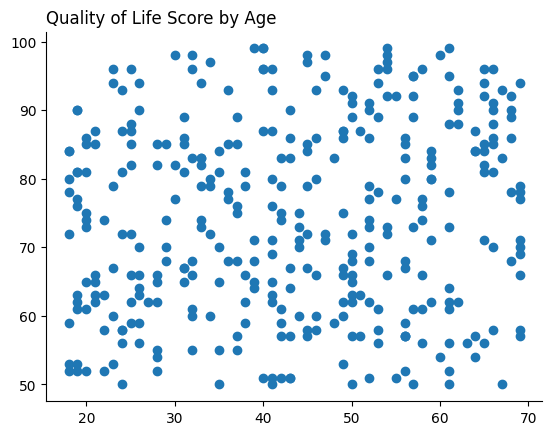

In [16]:
plt.figure()
plt.scatter(df.Age,df["Quality of Life Score"])
plt.title("Quality of Life Score by Age", loc = "left")
plt.show()

From the scatter plot, it can be concluded that the age parameter does not impact the Quality of Life Score.

## Gender Analysis

In [17]:
df.groupby("Gender")["Quality of Life Score"].agg(["min","max","mean","median"]).round(2)

,min,max,mean,median
Gender,,,,
F,50,99,74.24,74.0
M,50,99,74.15,73.0


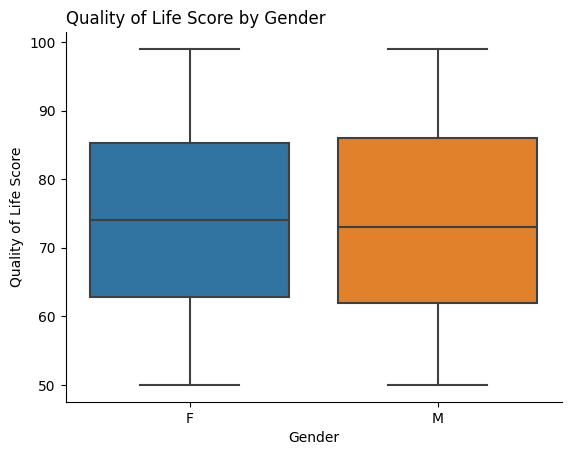

In [18]:
plt.figure()
sns.boxplot(x = "Gender", y = "Quality of Life Score", data = df)
plt.title("Quality of Life Score by Gender", loc = "left")
plt.show()

From the boxplots and the summary table, we can see that gender also is not an important parameter for Quality of Life Score.

## Joint Angle and Quality of Life

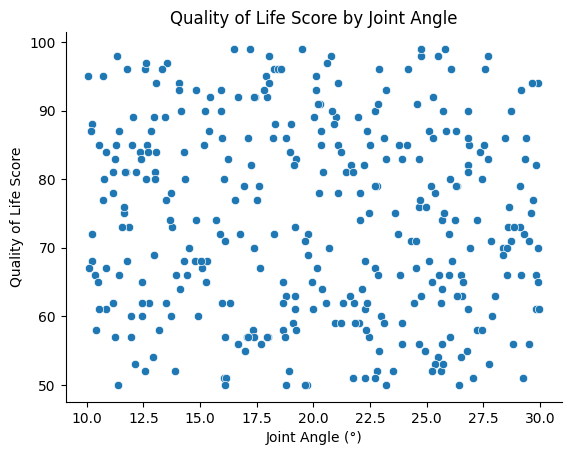

In [19]:
plt.figure()
sns.scatterplot(x = "Joint Angle (°)", y = "Quality of Life Score", data = df)
plt.title("Quality of Life Score by Joint Angle")
plt.show()

There is also no clear pattern between these two variables.

In [20]:
service_emg = df.groupby("Service Type")["EMG Activity"].value_counts(normalize = True)\
.reset_index().pivot(index = "Service Type",columns = "EMG Activity", values = "proportion")*100
service_emg.round(2)

EMG Activity,High,Low,Moderate
Service Type,,,
Consultation,31.62,30.77,37.61
Preventive,36.97,30.25,32.77
Rehab,32.43,33.33,34.23


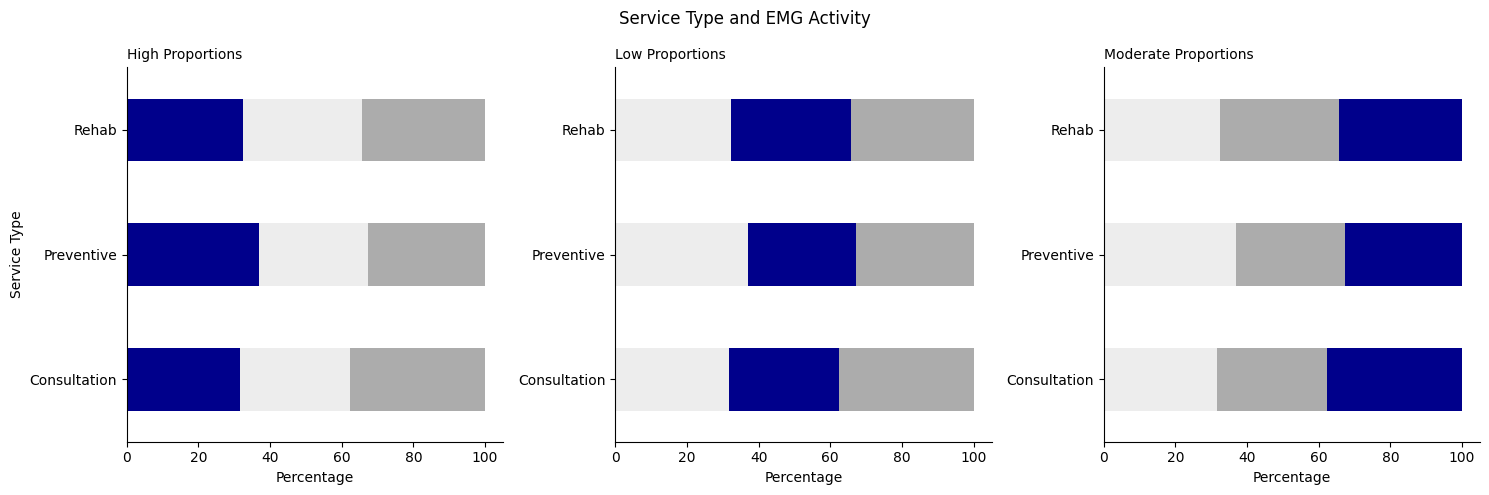

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize = (15,5))
colors1 = ["darkblue", "#ededed" , "#acacac"]
colors2 = ["#ededed", "darkblue", "#acacac"]
colors3 = ["#ededed", "#acacac", "darkblue"]

service_emg.plot(kind = "barh",stacked = True, ax = ax[0], color = colors1, legend = False)
service_emg.plot(kind = "barh",stacked = True, ax = ax[1], color = colors2, legend = False)
service_emg.plot(kind = "barh",stacked = True, ax = ax[2], color = colors3, legend = False)

ax[0].set_title("High Proportions", loc = "left",fontsize = 10)
ax[1].set_title("Low Proportions", loc = "left",fontsize = 10)
ax[2].set_title("Moderate Proportions", loc = "left",fontsize = 10)

ax[0].set_xlabel("Percentage")
ax[1].set_xlabel("Percentage")
ax[1].set_ylabel("")
ax[2].set_xlabel("Percentage")
ax[2].set_ylabel("")

plt.suptitle("Service Type and EMG Activity")
plt.tight_layout()
fig.show()

EMG activities does not vary significantly between service types.

## Socioeconomic Status and Quality of Life Score

In [22]:
df.groupby("SES")["Quality of Life Score"].agg(["min","max","mean","median"]).round(2)

,min,max,mean,median
SES,,,,
1,50,99,72.86,71.0
2,50,99,76.20,78.0
3,50,98,73.60,74.0
4,50,99,74.54,72.0


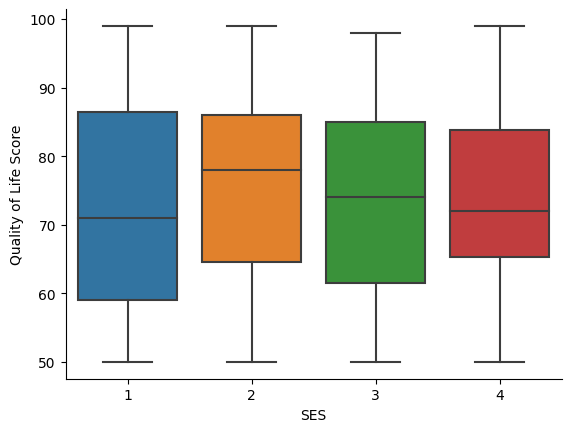

In [23]:
sns.boxplot(x = "SES", y = "Quality of Life Score", data = df);

The medians and interquartile ranges vary slightly. Minimum and maximum points between the groups are almost the same. Let's test whether these differences are statistically significant. Again after checking the requirements, since we are dealing with continuos variables and comparing more than one group at a time we will use ANOVA. The hypotheses are:

$H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4$

$H_A: \mu_i \neq \mu_j$ for at least one $i,j$ pair.


Text(0.0, 1.0, 'Quality of Life Score')

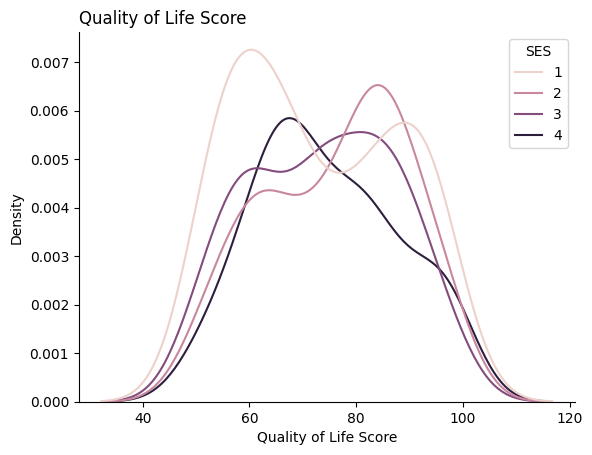

In [24]:
#Testing Gaussian Assumption
plt.figure()
sns.kdeplot(x = "Quality of Life Score", data = df, hue = "SES")
plt.title("Quality of Life Score",loc = "left")

In [25]:
#Checking the sample size criteria
df.groupby("SES")["Quality of Life Score"].size()

SES
1    107
2     83
3     83
4     74
Name: Quality of Life Score, dtype: int64

In [26]:
#quick way to separate the groups and apply bartlett test
groups = [group["Quality of Life Score"].values for name,group in df.groupby("SES")]
stats.bartlett(*groups)

BartlettResult(statistic=1.9912962150162512, pvalue=0.5742151716634922)

In [27]:
pg.anova(dv = "Quality of Life Score", data = df, between = "SES")

,Source,ddof1,ddof2,F,p-unc,np2
0,SES,3,343,0.965871,0.408955,0.008377


The p-value being 0.4 indicates that the difference between the groups are negligable.

# Conclusion

In this notebook, the relationships between predictors and their impact on life quality scores were analyzed. Based on the findings:

1. There is no evidence that women have a better life quality compared to men.

2. Utilizing healthcare services more frequently does not yield a better life quality.

3. Age does not necessarily play a role in life quality.

4. Increased socioeconomic status does not correspond to higher life quality scores.

As a side note, my personal opinion is that more data is needed to analyze this topic, as the outcomes do not align with my expectations.